In [1]:
%matplotlib inline

/Users/yusanlin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Keras on MNIST and CIFAR 10
===========================

This notebook goes through how to build simple neural networks to classify images in MNIST and CIFAR-10 datasets using Keras.

I first start from importing necessary packages. 

In [2]:
import time
import numpy as np

from keras.datasets import mnist, cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm

from scipy.misc import toimage

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

Using Theano backend.


# MNIST

MNIST dataset can be directly imported using the `load_data()` function. 

After loading the dataset, we can use `shape` to investigate the number of data points, as well as the dimensions of the data.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


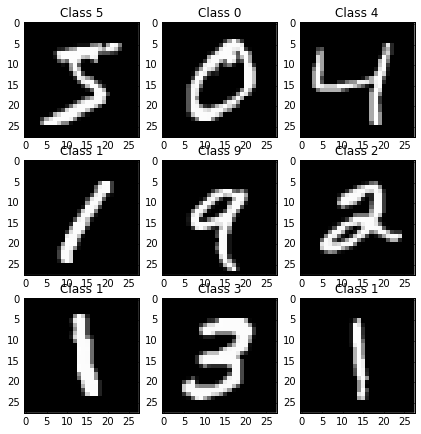

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print "Training matrix shape", X_train.shape
print "Testing matrix shape", X_test.shape

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
nb_classes = 10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## One hidden layer

In [7]:
model = Sequential()
model.add(Dense(100, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [9]:
%%capture
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          show_accuracy=True, verbose=1,
          validation_data=(X_test, Y_test))
time.sleep(0.1)

In [10]:
print model.evaluate(X_test, Y_test, verbose = 0)

0.109158902563


In [11]:
predicted_classes = model.predict_classes(X_test)
float(np.sum(predicted_classes == y_test)) / y_test.shape[0]

 9824/10000 [============================>.] - ETA: 0s

0.9676

## Two hidden layers

In [51]:
model = Sequential()
model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [52]:
%%capture
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          show_accuracy=True, verbose=1,
          validation_data=(X_test, Y_test))
time.sleep(0.1)

In [14]:
predicted_classes = model.predict_classes(X_test)
print "Accuracy:", float(np.sum(predicted_classes == y_test)) / y_test.shape[0]

 9760/10000 [============================>.] - ETA: 0s

0.9676

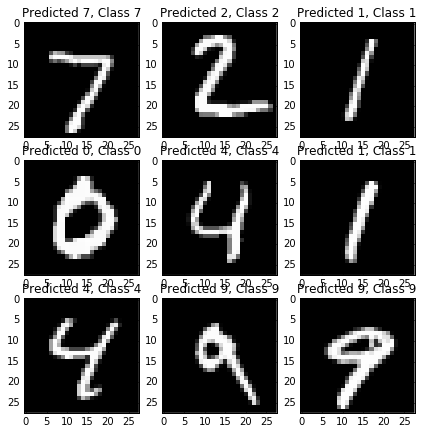

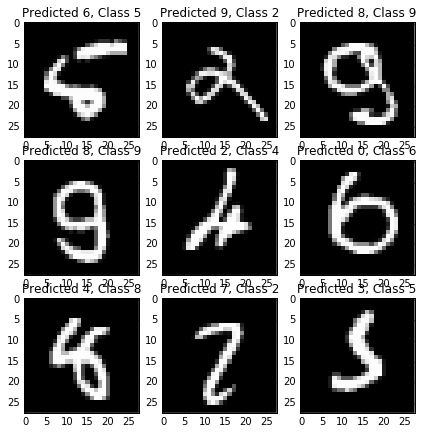

In [17]:
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

# Correctly classified

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
# Incorrectly classified
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# CIFAR-10

In [19]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(50000, 3, 32, 32)
(50000, 1)
(10000, 3, 32, 32)
(10000, 1)


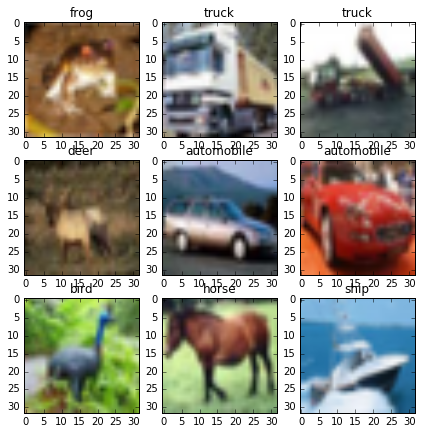

In [20]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(toimage(X_train[i]))
    plt.title("{}".format(labels[int(y_train[i])]))

In [21]:
nb_classes = 10
img_rows, img_cols = 32, 32
img_channels = 3

batch_size = 32
nb_epoch = 10

In [22]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [26]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
#model.add(Convolution2D(32, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
print model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_5 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 32, 32, 32)    0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 32, 8, 8)      0           activation_9[0][0]               
____________________________________________________________________________________________________
dropout_5 (Dropout)              (None, 32, 8, 8)      0           maxpooling2d_3[0][0]             
___________________________________________________________________________________________

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test  /= 255

In [121]:
# Create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_33 (Convolution2D) (None, 32, 32, 32)    896         convolution2d_input_9[0][0]      
____________________________________________________________________________________________________
dropout_29 (Dropout)             (None, 32, 32, 32)    0           convolution2d_33[0][0]           
____________________________________________________________________________________________________
convolution2d_34 (Convolution2D) (None, 32, 32, 32)    9248        dropout_29[0][0]                 
____________________________________________________________________________________________________
maxpooling2d_17 (MaxPooling2D)   (None, 32, 16, 16)    0           convolution2d_34[0][0]           
___________________________________________________________________________________________

In [27]:
%%capture
model.fit(X_train, Y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_data=(X_test, Y_test))

In [43]:
%%capture
predicted_classes = model.predict_classes(X_test)
#print "Accuracy:", float(np.sum(predicted_classes == y_test)) / y_test.shape[0]
score = model.evaluate(X_test, Y_test)

In [44]:
print score[1]

0.6536


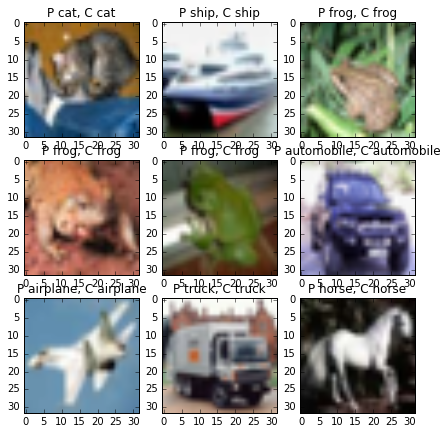

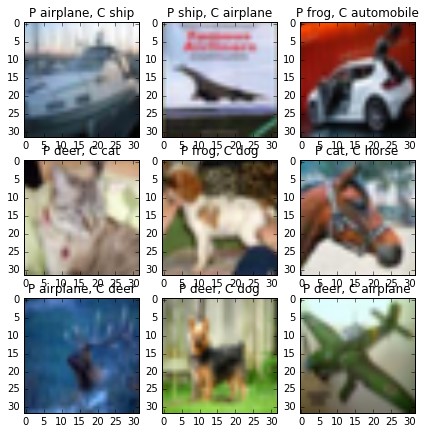

In [61]:
# Check which items we got right / wrong
correct_indices   = np.nonzero(predicted_classes == y_test.flatten())[0]
incorrect_indices = np.nonzero(predicted_classes != y_test.flatten())[0]

# Correctly classified

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    #plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.imshow(toimage(X_test[correct]))
    plt.title("P {}, C {}".format(labels[predicted_classes[correct]], labels[y_test[correct][0]]))
    
# Incorrectly classified
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    #plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.imshow(toimage(X_test[incorrect]))
    plt.title("P {}, C {}".format(labels[predicted_classes[incorrect]], labels[y_test[incorrect][0]]))